# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('files/training_set_VU_DM.csv')
test_df = pd.read_csv('files/test_set_VU_DM.csv')
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
train_df.shape

(4958347, 54)

In [4]:
train_df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [5]:
train_df.duplicated().sum()

0

In [6]:
test_df.shape

(4959183, 50)

In [7]:
test_df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4705752
visitor_hist_adr_usd           4704559
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7266
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1088032
prop_log_historical_price            0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4641025
orig_destination_distance      1608679
random_bool              

In [8]:
# check for extreme values where the column name does not contain 'id'
temp = train_df.loc[:, ~train_df.columns.str.contains('id')]
temp = temp.loc[:, ~temp.columns.str.contains('bool')]

In [9]:
temp.describe()

,visitor_hist_starrating,visitor_hist_adr_usd,prop_starrating,prop_review_score,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
count,251866.000000,252988.000000,4.958347e+06,4.950983e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,...,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,138390.000000
mean,3.374334,176.022659,3.180525e+00,3.777777e+00,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,...,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,386.283316
std,0.692519,107.254493,1.051024e+00,1.050329e+00,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,...,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,821.190577
min,1.410000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000
25%,2.920000,109.810000,3.000000e+00,3.500000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,...,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,124.000000
50%,3.450000,152.240000,3.000000e+00,4.000000e+00,2.770000e+00,6.900000e-02,4.910000e+00,1.600000e+01,1.220000e+02,0.000000e+00,...,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,218.400000
75%,3.930000,213.490000,4.000000e+00,4.500000e+00,4.040000e+00,1.805000e-01,5.310000e+00,2.600000e+01,1.849600e+02,0.000000e+00,...,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,429.790000
max,5.000000,1958.700000,5.000000e+00,5.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,...,1.000000,1.000000,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,159292.380000


<AxesSubplot:>

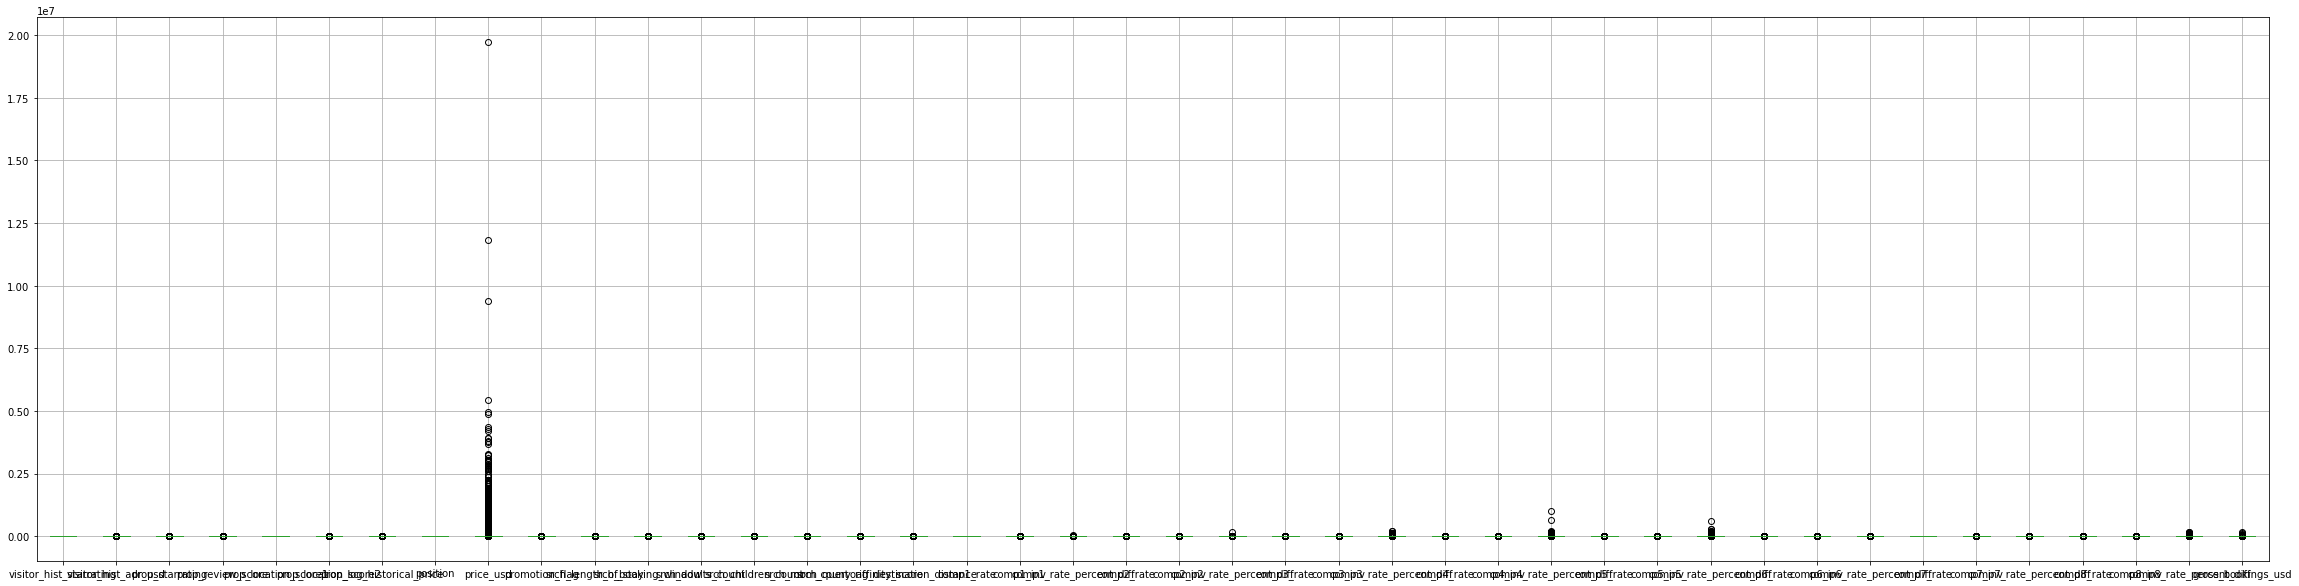

In [11]:
columns_worth_plotting = ["visitor_hist_starrating", ]